In [ ]:
### Initial request
from utils import *
from pathlib import Path
import logging
from tqdm.auto import tqdm

logger = logging.getLogger("my_custom_logger")  # Give your logger a unique name.
handler = logging.FileHandler("data_download.log")  # Specify the log file.

# Configure the log level and format for this custom logger
logger.setLevel(logging.DEBUG)  # Set the desired log level.
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)

# Add the handler to the custom logger
logger.addHandler(handler)

from_dt = dt.date(2010, 1, 1).strftime('%Y-%m-%d')
to_dt = dt.date(2023, 9, 20).strftime('%Y-%m-%d')
pricearrival = agmarknetOptions.price_arrival.Price
commodity = agmarknetOptions.commodities.Ajwan
state = agmarknetOptions.state.__Select__


In [19]:
from utils import *
from pathlib import Path
import logging
from tqdm.notebook import tqdm
import pickle
import os
import shutil
import matplotlib.pyplot as plt

fol_path = Path('./Data')
ca_path = Path('./Cache')

import pandas as pd
df = pd.read_feather(fol_path / 'Soji.feather')

In [20]:
df.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [33]:
from collections import defaultdict

def get_data(file_name):
    
    df = pd.read_feather(file_name)
    dic = defaultdict(lambda: defaultdict(list))

    def helper(row):
        dic[row['District Name']][row['Price Date']].append(float(row['Modal Price (Rs./Quintal)']))

    df.apply(helper, axis=1)
    data = []

    for dist in dic:
        for date in sorted(dic[dist]):
            cur = dic[dist][date]
            data.append({
                'Date': date,
                'District': dist,
                'Price': round(sum(cur)/len(cur), 2)
            })

    df = pd.DataFrame(data)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    return df


df = get_data(fol_path / 'Soji.feather')

df['date'] = pd.to_datetime(df['Date'])
df['price'] = df['Price']


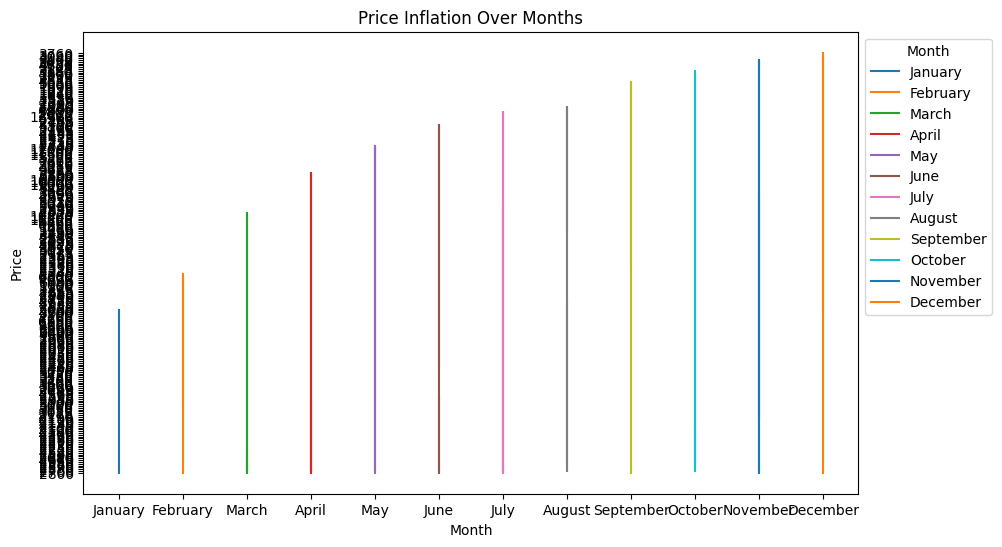

In [22]:



# Assuming you have a DataFrame named 'df' with 'date' and 'price' columns
df['month'] = df['date'].dt.month

# Set up the plot
plt.figure(figsize=(10, 6))

# Group the data by month
grouped = df.groupby('month')

# Define a list of month names for the x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Loop through each group and plot the corresponding data
for month, group_data in grouped:
    month_name = month_names[month - 1]  # -1 to adjust for 0-based indexing
    plt.plot(group_data['month'], group_data['price'], label=month_name)

# Set labels and legend
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Inflation Over Months')
plt.xticks(range(1, 13), month_names)  # Set x-axis labels
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

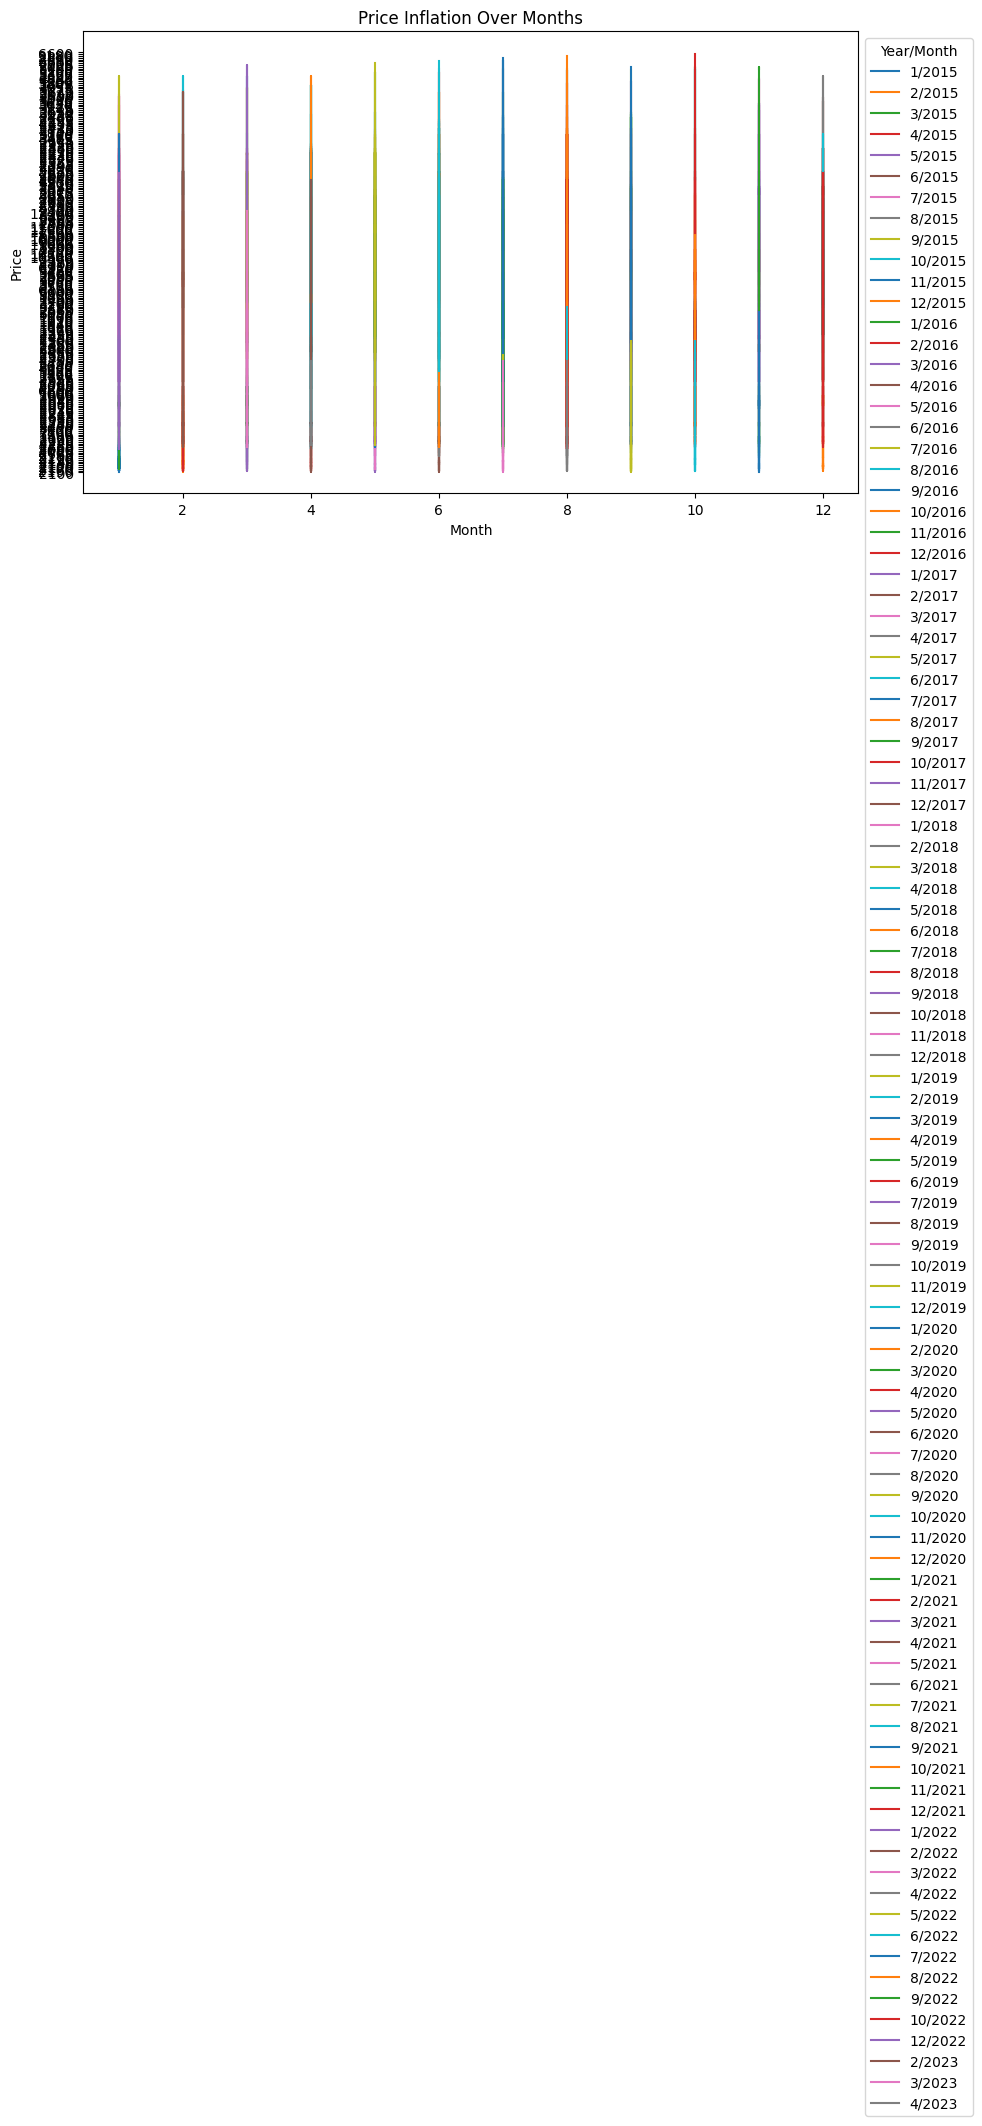

In [23]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Set up the plot
plt.figure(figsize=(10, 6))

# Group the data by year and month
grouped = df.groupby(['year', 'month'])

# Loop through each group and plot the corresponding data
for (year, month), group_data in grouped:
    label = f"{month}/{year}"
    plt.plot(group_data['month'], group_data['price'], label=label)

# Set labels and legend
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Inflation Over Months')
plt.legend(title='Year/Month', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


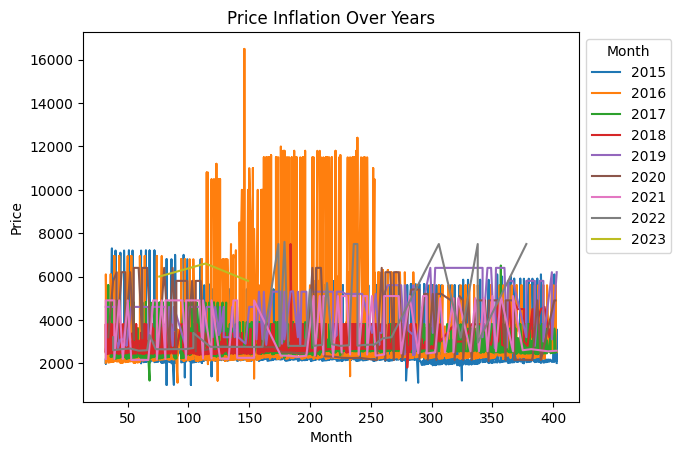

In [34]:
df = df.sort_values('date')

df['year'] = df['date'].dt.year
df['x'] = df['date'].dt.month*31 + df['date'].dt.day


grouped = df.groupby('year')

for year, group_data in grouped:

    plt.plot(group_data['x'], group_data['price'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Inflation Over Years')
plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [2]:
import streamlit as st
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import os
from collections import defaultdict



In [4]:


df.shape

(1883, 3)

In [10]:
df['Date']

1        2015-01-01
136      2015-01-03
303      2015-01-07
368      2015-01-08
787      2015-01-16
            ...    
191961   2023-09-16
191985   2023-09-17
192101   2023-09-18
192192   2023-09-19
192253   2023-09-20
Name: Date, Length: 1883, dtype: datetime64[ns]

In [37]:
from statsmodels.tsa.arima.model import ARIMA

duration = 10

# st.title("ARIMA Price Forecasting")


# Specify the order of the ARIMA model (p, d, q)
p, d, q = 1, 1, 1
model = ARIMA(df['Price'], order=(p, d, q))
results = model.fit()

n_days = 30*duration
forecast = results.forecast(steps=n_days)

/home/sunil/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunil/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunil/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunil/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pr

In [38]:
import datetime as dt

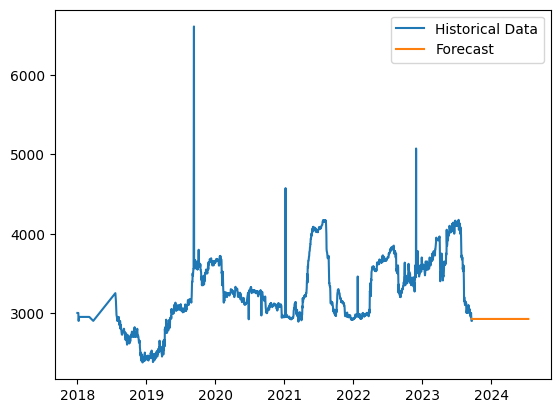

In [39]:
# Display the historical data

df = df[df.index >= dt.datetime(year=2018, month=1, day=1)]

# # Display the forecasted prices
forecast_index = pd.date_range(start=df.index[-1], periods=n_days+1, inclusive='right')
forecast.index = forecast_index

# st.line_chart(forecast_series)
# Optionally, you can display additional information about the model, such as summary statistics or diagnostic plots.
# st.write("ARIMA Model Summary:")
# st.write(results.summary())

# Show the plot of the historical data and forecast
st.write("Historical Data and Forecast:")
plt.plot(df['Price'], label='Historical Data')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [21]:
forecast_index.shape, forecast.shape

((30,), (30,))

pandas.core.series.Series

In [40]:
df

,District,Price
Date,,
2018-01-02,Banda,3000.0
2018-01-05,Banda,3000.0
2018-01-06,Banda,3000.0
2018-01-07,Banda,3000.0
2018-01-08,Banda,2900.0
...,...,...
2023-09-16,Banda,2975.0
2023-09-17,Banda,3000.0
2023-09-18,Banda,2930.0


2023-09-21    2923.456185
2023-09-22    2921.827489
2023-09-23    2921.940578
2023-09-24    2921.932726
2023-09-25    2921.933271
2023-09-26    2921.933233
2023-09-27    2921.933236
2023-09-28    2921.933236
2023-09-29    2921.933236
2023-09-30    2921.933236
2023-10-01    2921.933236
2023-10-02    2921.933236
2023-10-03    2921.933236
2023-10-04    2921.933236
2023-10-05    2921.933236
2023-10-06    2921.933236
2023-10-07    2921.933236
2023-10-08    2921.933236
2023-10-09    2921.933236
2023-10-10    2921.933236
2023-10-11    2921.933236
2023-10-12    2921.933236
2023-10-13    2921.933236
2023-10-14    2921.933236
2023-10-15    2921.933236
2023-10-16    2921.933236
2023-10-17    2921.933236
2023-10-18    2921.933236
2023-10-19    2921.933236
2023-10-20    2921.933236
Freq: D, Name: predicted_mean, dtype: float64

In [45]:
def get_data(file_name):
    
    df = pd.read_feather(file_name)
    dic = defaultdict(lambda: defaultdict(list))

    def helper(row):
        dic[row['District Name']][row['Price Date']].append(float(row['Modal Price (Rs./Quintal)']))

    df.apply(helper, axis=1)
    data = []

    for dist in dic:
        for date in sorted(dic[dist]):
            cur = dic[dist][date]
            data.append({
                'Date': date,
                'District': dist,
                'Price': round(sum(cur)/len(cur), 2)
            })

    df = pd.DataFrame(data)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    return df

# st.set_page_config(
#     page_title="Forecast",
#     page_icon="📈",
# )

fol_path = Path('./Data/')
crop = list(map(lambda x: x[:-8], os.listdir(fol_path)))

commodity = crop[1]

df = get_data(fol_path / f'{commodity}.feather')

districts = df['District'].unique()

district = districts[1]

df = df[df['District'] == district]

df.set_index('Date', inplace=True)

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load your time series data into a DataFrame (assuming you have a 'Date' and 'Price' column)
# Make sure your 'Date' column is in datetime format.
# df = pd.read_csv('your_data.csv')

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Agricultural Commodity Price Time Series')
plt.show()

# Determine the seasonal order (P, D, Q, s)
# You can start with s=12 for monthly data, s=4 for quarterly data, etc.
# ACF and PACF plots are useful for finding P and Q.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for non-seasonal components (p, d, q)
plot_acf(df['Price'])
plot_pacf(df['Price'])
plt.show()

# ACF and PACF plots for seasonal components (P, D, Q)
s = 12  # Seasonality (e.g., 12 for monthly data)
plot_acf(df['Price'], lags=s)
plot_pacf(df['Price'], lags=s)
plt.show()

# Based on the ACF and PACF plots, you can estimate appropriate values for p, d, q, P, D, and Q.

# Fit the SARIMA model
p, d, q = 1, 1, 1  # Replace with your chosen values for p, d, and q
P, D, Q, s = 1, 1, 1, 12  # Replace with your chosen values for P, D, Q, and s

df.set_index('Date', inplace=True)
model = sm.tsa.SARIMAX(df['Price'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Forecast future values
n_forecast = 30  # Number of periods to forecast

forecast = results.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Observed', color='b')
plt.plot(forecast_mean.index, forecast_mean.values, label='Forecast', color='r')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Agricultural Commodity Price Forecast')
plt.legend()
plt.show()


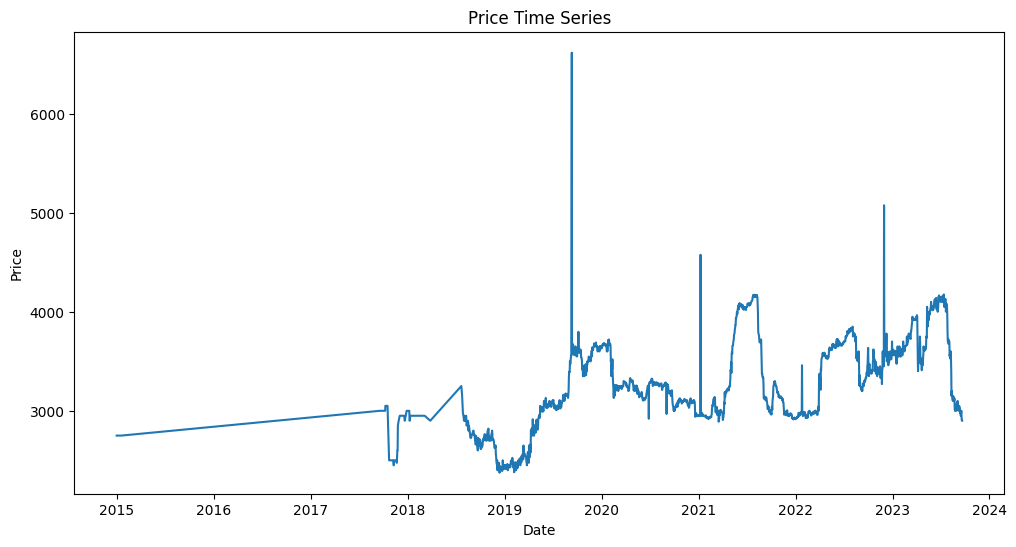

/home/sunil/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunil/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.26464D+00    |proj g|=  6.80108D-02

At iterate    5    f=  6.21288D+00    |proj g|=  4.23731D-03

At iterate   10    f=  6.20475D+00    |proj g|=  3.09900D-03

At iterate   15    f=  6.11566D+00    |proj g|=  2.96517D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     25      1     0     0   2.372D-06   6.116D+00
  F =   6.1156477218992196     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/sunil/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sunil/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


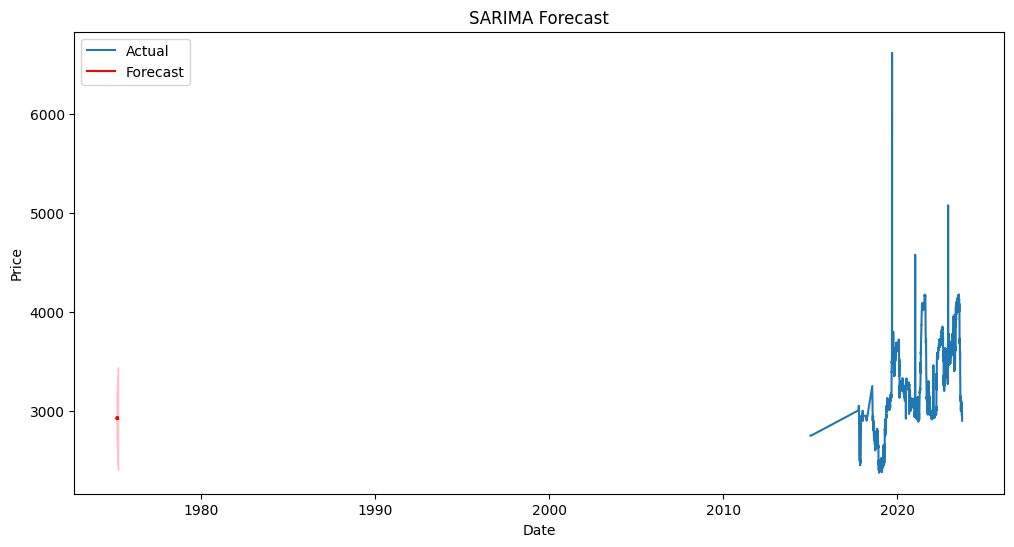

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# Load your time series data with datetime index
# Replace 'your_data.csv' with your data source
 # Resample to daily frequency (adjust as needed)

# Visualize your time series data to identify seasonality and trends
plt.figure(figsize=(12, 6))
plt.plot(df['Price'])
plt.title('Price Time Series')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Determine p, d, q, P, D, Q based on visual analysis and ACF/PACF plots

# Fit the SARIMA model
p, d, q = 1, 1, 1  # Replace with appropriate values for your data
P, D, Q, s = 1, 1, 1, 7  # s is the seasonal period (e.g., 7 for weekly data)

model = SARIMAX(df['Price'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Specify the number of forecasted periods
n_days = 30  # Change this according to your needs

# Generate forecasts
forecast = results.get_forecast(steps=n_days)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Visualize the forecasted values and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Actual')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink')
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [48]:
forecast_values

1883    2921.577664
1884    2918.595065
1885    2934.962742
1886    2916.869203
1887    2924.196664
1888    2917.682613
1889    2921.337321
1890    2919.342903
1891    2918.627009
1892    2934.697170
1893    2915.611667
1894    2924.729918
1895    2918.759914
1896    2922.499277
1897    2919.958842
1898    2919.295453
1899    2935.358723
1900    2916.250243
1901    2925.409975
1902    2919.452573
1903    2923.193897
1904    2920.640814
1905    2919.978642
1906    2936.041752
1907    2916.932739
1908    2926.093433
1909    2920.136322
1910    2923.877691
1911    2921.324316
1912    2920.662172
Name: predicted_mean, dtype: float64

In [ ]:
# rnn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate a sample commodity price dataset (replace this with your actual dataset)
np.random.seed(0)
time = np.arange(0, 100, 1)
price = 10 + np.sin(0.1 * time) + np.random.normal(scale=0.2, size=len(time))

# Create a DataFrame
df = pd.DataFrame({'Time': time, 'Price': price})

# Visualize the dataset
plt.plot(df['Time'], df['Price'])
plt.xlabel('Time')
plt.ylabel('Commodity Price')
plt.title('Commodity Price Over Time')
plt.show()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

# Create sequences for RNN
sequence_length = 10
sequences = []
target = []

for i in range(len(df) - sequence_length):
    seq = df['Price'].values[i:i+sequence_length]
    label = df['Price'].values[i+sequence_length]
    sequences.append(seq)
    target.append(label)

# Convert to numpy arrays
X = np.array(sequences)
y = np.array(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform to get the original scale of prices
train_predictions = scaler.inverse_transform(train_predictions)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train_original, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predictions))
print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df['Time'][:-sequence_length], df['Price'][:-sequence_length], label='Actual Price')
plt.plot(df['Time'][sequence_length:], train_predictions, label='Training Predictions')
plt.plot(df['Time'][-len(test_predictions):], test_predictions, label='Testing Predictions')
plt.xlabel('Time')
plt.ylabel('Commodity Price')
plt.title('Commodity Price Forecasting with RNN')
plt.legend()
plt.show()

# creating graph

In [1]:
def get_data(file_name):
    
    df = pd.read_feather(file_name)
    dic = defaultdict(lambda: defaultdict(list))

    def helper(row):
        dic[row['District Name']][row['Price Date']].append(float(row['Modal Price (Rs./Quintal)']))

    df.apply(helper, axis=1)
    data = []

    for dist in dic:
        for date in sorted(dic[dist]):
            cur = dic[dist][date]
            data.append({
                'Date': date,
                'District': dist,
                'Price': round(sum(cur)/len(cur), 2)
            })

    df = pd.DataFrame(data)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date').reset_index(drop=True)
    return df

In [17]:
import pandas as pd
import os
from collections import defaultdict
import matplotlib.pyplot as plt

[ele for ele in os.listdir('Data') if 'Ground' in ele]

['Groundnut.feather',
 'Ground Nut Oil.feather',
 'Groundnut (Split).feather',
 'Groundnut pods (raw).feather',
 'Ground Nut Seed.feather']

In [8]:

data = get_data('Data/Groundnut.feather')

In [38]:
ground_nut = data['District'].value_counts()
ground_nut[:5]

Mahbubnagar    2787
Rajkot         2477
Kurnool        2405
Gadag          2394
Junagarh       2385
Name: District, dtype: int64

In [40]:
mah = data[data['District'] == 'Mahbubnagar']

In [42]:
graph_over_year = defaultdict(lambda : defaultdict(None))

def custom(row):
    print(type(row['Date']))
    break

mah.apply(custom)

SyntaxError: 'break' outside loop (2646230714.py, line 5)